In [20]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import rc_context
from matplotlib.pyplot import rcParams
from matplotlib import colors

import gseapy as gp
from gseapy.plot import barplot, dotplot, gseaplot, heatmap


sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.0 pynndescent==0.5.5


In [21]:
pwd

'/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2'

## Color maps

In [22]:
#Define a nice colour map for gene expression
grey = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
reds = plt.cm.Oranges(np.linspace(0, 1, 128))
colorsComb_reds = np.vstack([grey, reds])
mymap_reds = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_reds)

oranges = plt.cm.Oranges(np.linspace(0, 1, 128))
colorsComb_oranges = np.vstack([grey, oranges])
mymap_oranges = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_oranges)

blues = plt.cm.Blues(np.linspace(0, 1, 128))
colorsComb_blues = np.vstack([grey, blues])
mymap_blues = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb_blues)


# ------------------------


In [23]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_bbknn.h5ad')


In [24]:
adata

AnnData object with n_obs × n_vars = 29372 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden', 'S_score', 'G2M_score', 'phase', 'leiden_bbknn'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'hvg', 'leiden', 'leiden_bbknn_colors', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'sample_colors', 'sample_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'


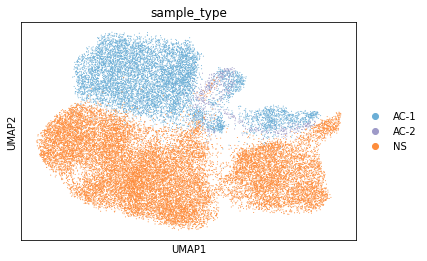

In [25]:
sc.pl.umap(adata, color='sample_type')

In [26]:
# with rc_context({'font.size': 15.0,'figure.figsize': (4, 4)}):
#     sc.pl.violin(adata, ['Trp53','Cdkn2a','Cdkn2d'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                  inner='quartile'
#                 )
#     sc.pl.violin(adata, ['Cdkn1a','Cdkn1b','Cdkn1c'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                  inner='quartile'
#                 )
#     sc.pl.violin(adata, ['Ccna1','Ccna2','Ccnb1','Ccnb2'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                 inner='quartile'
#                 )
#     sc.pl.violin(adata, ['Ccnd1','Ccnd2','Ccnd3','Ccne1','Ccne2'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                  inner='quartile'
#                 )
#     sc.pl.violin(adata, ['Cdk4','Cdk1','Cdk6','Cdk2'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                  inner='quartile'
#                 )

In [27]:
# with rc_context({'font.size': 15.0,'figure.figsize': (4, 4)}):
    
#     sc.pl.violin(adata, ['Cdk4','Cdk1','Cdk6','Cdk2'],
#              stripplot=False, groupby = 'sample_type', rotation=60,
#                 inner='quartile'
#                 )


### Represent percentage of cells in each phase of the cell cycle

In [28]:
adata_AC1 = adata[adata.obs['sample_type']=='AC-1']
adata_AC2 = adata[adata.obs['sample_type']=='AC-2']
adata_NS = adata[adata.obs['sample_type']=='NS']


In [29]:
labels = list(set(adata.obs['phase']))

In [30]:
AC1_counts = adata_AC1.obs['phase'].value_counts().tolist()
AC2_counts = adata_AC2.obs['phase'].value_counts().tolist()
NS_counts = adata_NS.obs['phase'].value_counts().tolist()

In [31]:
adata.uns['phase_colors']

array(['#db7093', '#40e0d0', '#c0c0c0'], dtype=object)

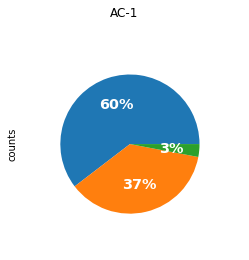

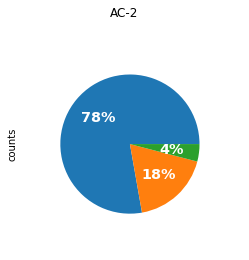

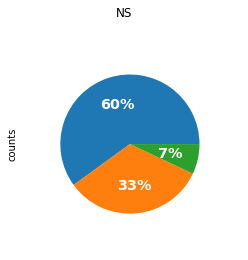

In [32]:
AC1 = pd.DataFrame({'counts': AC1_counts}, index=labels) 
AC1_perc = (100. * AC1 / AC1.sum()).round(0)
AC1_perc.plot.pie(subplots=True, title='AC-1', legend=None, autopct='%1.0f%%',
                  radius=0.8, 
                  textprops={'size': 'x-large', 'weight': 'semibold', 'color':'w'});

AC2 = pd.DataFrame({'counts': AC2_counts}, index=labels)
AC2_perc = (100. * AC2 / AC2.sum()).round(0)
AC2_perc.plot.pie(subplots=True, title='AC-2',legend=None, autopct='%1.0f%%',
                  radius=0.8, 
                    textprops={'size': 'x-large', 'weight': 'semibold', 'color':'w'});

NS = pd.DataFrame({'counts': NS_counts}, index=labels)
NS_perc = (100. * NS / NS.sum()).round(0)
NS_perc.plot.pie(subplots=True, title='NS',legend=None, autopct='%1.0f%%',
                  radius=0.8, 
                  textprops={'size': 'x-large', 'weight': 'semibold', 'color':'w'});



In [19]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run2/data/5GEX_run2_bbknn.h5ad')


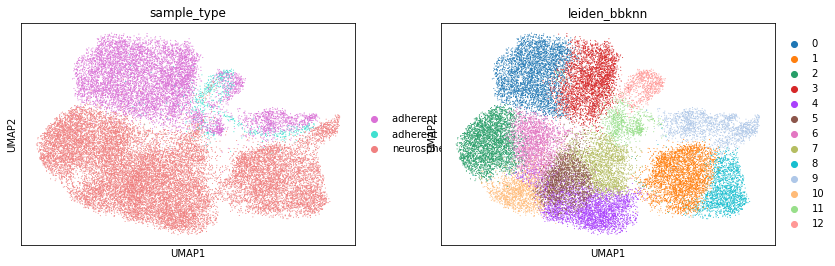

In [5]:
sc.pl.umap(adata, color=['sample_type','leiden_bbknn'])

In [6]:
sc.tl.leiden(adata, resolution=0.3, 
             restrict_to = ('leiden_bbknn', ['9']), key_added='leiden_rec9')

running Leiden clustering
    finished: found 15 clusters and added
    'leiden_rec9', the cluster labels (adata.obs, categorical) (0:00:00)


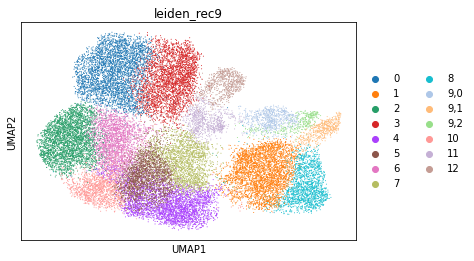

In [7]:
sc.pl.umap(adata, color=['leiden_rec9'])

In [31]:
adata.obs['group']='Sph1'
adata.obs.loc[adata.obs['leiden_bbknn'].isin(['0','3']) , 'group'] = "Adh1"
adata.obs.loc[adata.obs['leiden_bbknn'].isin(['11','12']) , 'group'] = "Adh2"
adata.obs.loc[adata.obs['leiden_rec9'].isin(['9,0','9,2']) , 'group'] = "Adh3"
adata.obs.loc[adata.obs['leiden_bbknn'].isin(['1','8']) , 'group'] = "Sph2"
adata.obs.loc[adata.obs['leiden_rec9'].isin(['9,1']) , 'group'] = "Sph3"


In [4]:
with rc_context({'font.size': 15.0,'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color=['group'], size=10)

NameError: name 'adata' is not defined

In [26]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run3/data/cells_5GEX_bbknn.h5ad')

# DE analysis

In [5]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/5GEX/run3/data/cells_5GEX_bbknn.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 29372 × 54446
    obs: 'sample_ID', 'sample', 'sample_type', 'mCherry', '10x_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden', 'S_score', 'G2M_score', 'phase', 'leiden_bbknn', 'leiden_rec9', 'group'
    var: 'gene_symbols', 'feature_types', 'ensemblid', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'group_colors', 'hvg', 'leiden', 'leiden_bbknn_colors', 'leiden_colors', 'leiden_rec9_colors', 'neighbors', 'pca', 'phase_colors', 'sample_colo

ranking genes
    finished: added to `.uns['rank_genes_group']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


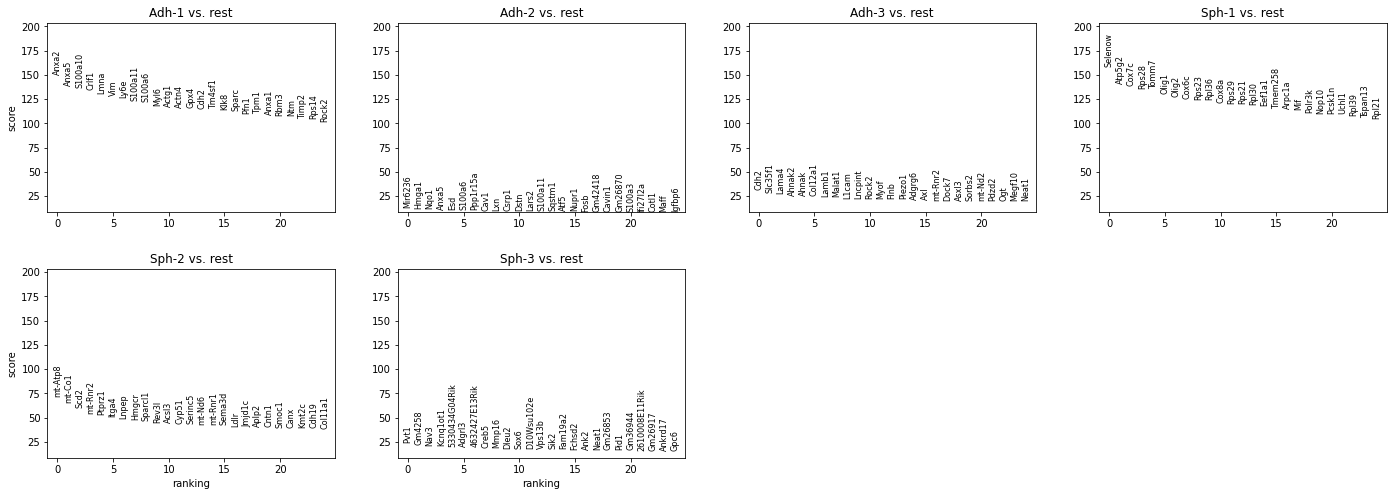

In [6]:
sc.tl.rank_genes_groups(adata, groupby='group', key_added='rank_genes_group')
sc.pl.rank_genes_groups(adata, key='rank_genes_group', n_genes=25)

In [6]:
set(adata.obs['sample_type'])

{'adherent (differentiated)', 'adherent (original)', 'neurospheres'}

ranking genes
    finished: added to `.uns['rank_genes_sample_type']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


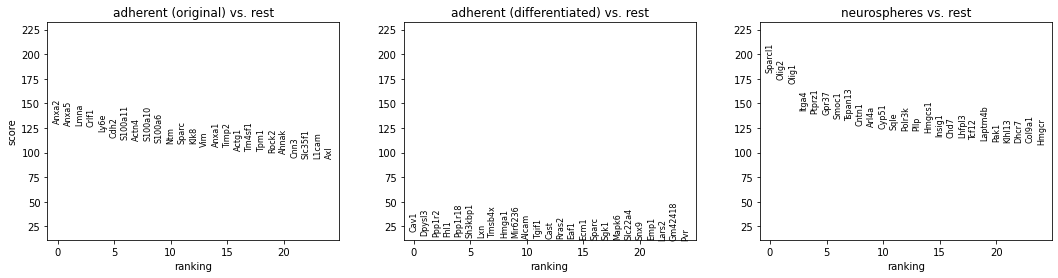

In [7]:
sc.tl.rank_genes_groups(adata, groupby='sample_type', key_added='rank_genes_sample_type')
sc.pl.rank_genes_groups(adata, key='rank_genes_sample_type', n_genes=25)

In [8]:
adh_ori = sc.get.rank_genes_groups_df(adata, group='adherent (original)', key='rank_genes_sample_type', pval_cutoff=0.01, log2fc_min=0)['names']
adh_dif = sc.get.rank_genes_groups_df(adata, group='adherent (differentiated)', key='rank_genes_sample_type', pval_cutoff=0.01, log2fc_min=0)['names']
sph = sc.get.rank_genes_groups_df(adata, group='neurospheres', key='rank_genes_sample_type', pval_cutoff=0.01, log2fc_min=0)['names']


### Adherent

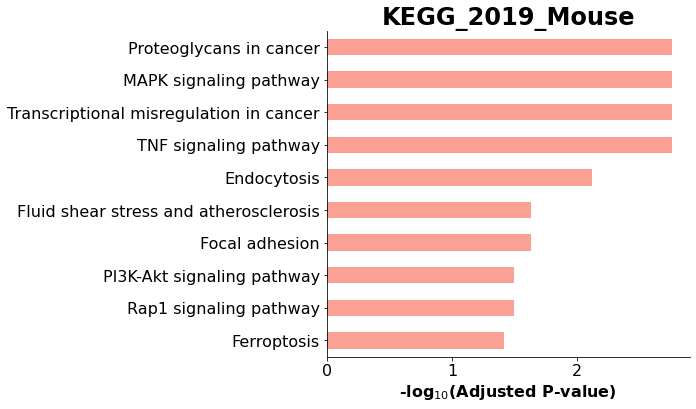

In [100]:
enr_res = gp.enrichr(gene_list=list(set(adh_ori) & set(adh_dif)),
                     organism='Mouse',
                     gene_sets='KEGG_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='KEGG_2019_Mouse')

### Neurospheres

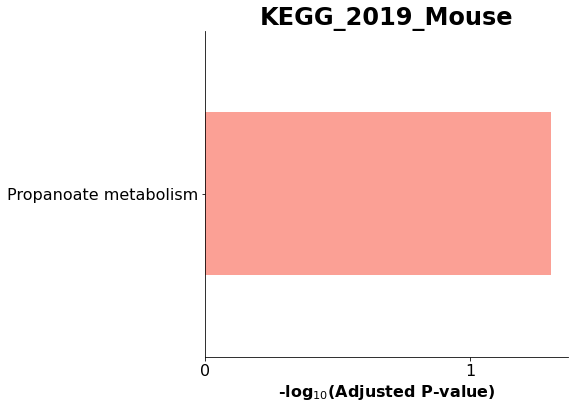

In [99]:
enr_res = gp.enrichr(gene_list=list(set(sph)),
                     organism='Mouse',
                     gene_sets='KEGG_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='KEGG_2019_Mouse')

In [101]:
enr_res = gp.enrichr(gene_list=list(set(sph)),
                     organism='Mouse',
                     gene_sets='GO_Molecular_Function_2021',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='GO_Molecular_Function_2021')

ranking genes
    finished: added to `.uns['rank_genes_adh(dif)-ori']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


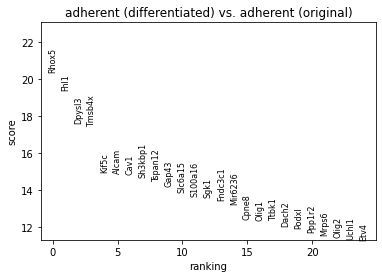

In [85]:
sc.tl.rank_genes_groups(adata, groupby='sample_type', key_added='rank_genes_adh(dif)-ori',
                        groups=['adherent (differentiated)'], reference='adherent (original)'
                        )
sc.pl.rank_genes_groups(adata, key='rank_genes_adh(dif)-ori', n_genes=25)

ranking genes
    finished: added to `.uns['rank_genes_adh(dif)-sph']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


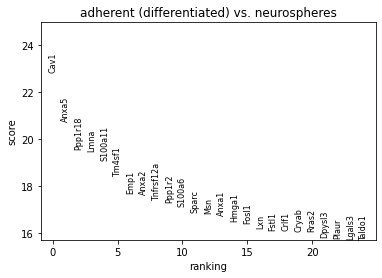

In [84]:
sc.tl.rank_genes_groups(adata, groupby='sample_type', key_added='rank_genes_adh(dif)-sph',
                        groups=['adherent (differentiated)'], reference='neurospheres'
                        )
sc.pl.rank_genes_groups(adata, key='rank_genes_adh(dif)-sph', n_genes=25)

In [86]:
dif_to_ori = sc.get.rank_genes_groups_df(adata, group='adherent (differentiated)', key='rank_genes_adh(dif)-ori', pval_cutoff=0.01, log2fc_min=0)['names']
dif_to_sph = sc.get.rank_genes_groups_df(adata, group='adherent (differentiated)', key='rank_genes_adh(dif)-sph', pval_cutoff=0.01, log2fc_min=0)['names']


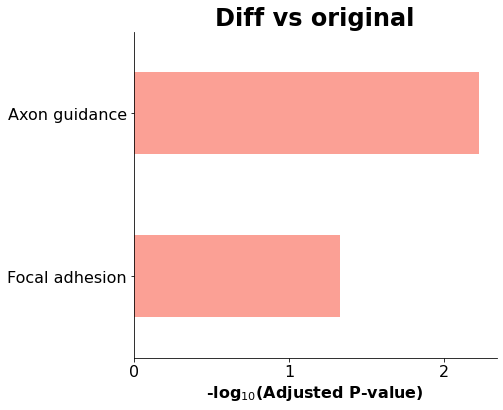

In [88]:
enr_res = gp.enrichr(gene_list=list(set(dif_to_ori)),
                     organism='Mouse',
                     gene_sets='KEGG_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='Diff vs original')

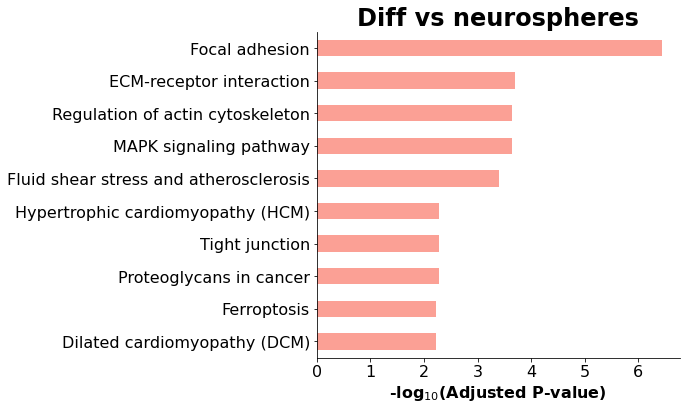

In [90]:
enr_res = gp.enrichr(gene_list=list(set(dif_to_sph)),
                     organism='Mouse',
                     gene_sets='KEGG_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='Diff vs neurospheres')

ranking genes
    finished: added to `.uns['t-test']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


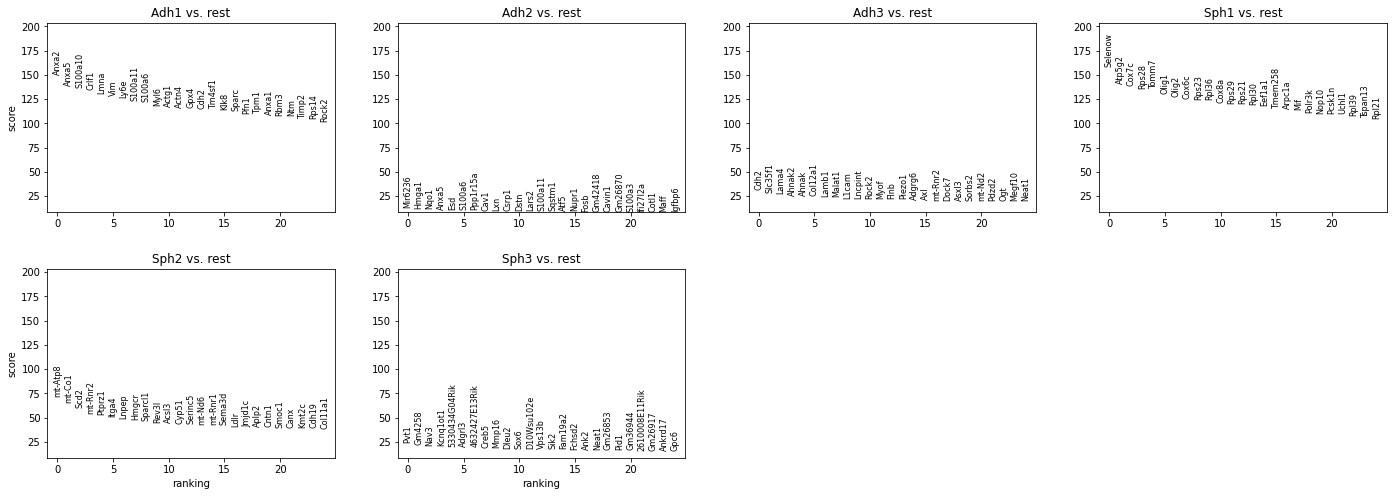

In [33]:
sc.tl.rank_genes_groups(adata, groupby='group', key_added='t-test')
sc.pl.rank_genes_groups(adata, key='t-test', n_genes=25)

In [59]:
groups = list(set(adata.obs['group']))
groups

['Sph2', 'Sph3', 'Adh3', 'Sph1', 'Adh1', 'Adh2']

In [21]:
enr_res = gp.enrichr(gene_list=list(set(Adh 1) & set(Adh 2) & set(Adh 3)),
                     organism='Mouse',
                     gene_sets='KEGG_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)

with rc_context({'font.size': 15.0,'figure.figsize': (5,5)}):
    gp.barplot(enr_res.res2d,title='Culture', color='lightcoral')

SyntaxError: invalid syntax (3698719979.py, line 1)

## Score gene signatures

In [11]:
gene_set_names = gp.get_library_name(organism='Mouse')


In [12]:
gene_set_names

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [13]:
gene_set = 'KEGG_2019_Mouse'

In [14]:
gene_set

'KEGG_2019_Mouse'

In [28]:
hypoxia = ! curl https://www.gsea-msigdb.org/gsea/msigdb/download_geneset.jsp?geneSetName=HALLMARK_HYPOXIA&fileType=TSV

In [29]:
hypoxia = list(hypoxia)
hypoxia = hypoxia[8:]
hypoxia

['ACKR3',
 'ADM',
 'ADORA2B',
 'AK4',
 'AKAP12',
 'ALDOA',
 'ALDOB',
 'ALDOC',
 'AMPD3',
 'ANGPTL4',
 'ANKZF1',
 'ANXA2',
 'ATF3',
 'ATP7A',
 'B3GALT6',
 'B4GALNT2',
 'BCAN',
 'BCL2',
 'BGN',
 'BHLHE40',
 'BNIP3L',
 'BRS3',
 'BTG1',
 'CA12',
 'CASP6',
 'CAV1',
 'CAVIN1',
 'CAVIN3',
 'CCN1',
 'CCN2',
 'CCN5',
 'CCNG2',
 'CDKN1A',
 'CDKN1B',
 'CDKN1C',
 'CHST2',
 'CHST3',
 'CITED2',
 'COL5A1',
 'CP',
 'CSRP2',
 'CXCR4',
 'DCN',
 'DDIT3',
 'DDIT4',
 'DPYSL4',
 'DTNA',
 'DUSP1',
 'EDN2',
 'EFNA1',
 'EFNA3',
 'EGFR',
 'ENO1',
 'ENO2',
 'ENO3',
 'ERO1A',
 'ERRFI1',
 'ETS1',
 'EXT1',
 'F3',
 'FAM162A',
 'FBP1',
 'FOS',
 'FOSL2',
 'FOXO3',
 'GAA',
 'GALK1',
 'GAPDH',
 'GAPDHS',
 'GBE1',
 'GCK',
 'GCNT2',
 'GLRX',
 'GPC1',
 'GPC3',
 'GPC4',
 'GPI',
 'GRHPR',
 'GYS1',
 'HAS1',
 'HDLBP',
 'HEXA',
 'HK1',
 'HK2',
 'HMOX1',
 'HOXB9',
 'HS3ST1',
 'HSPA5',
 'IDS',
 'IER3',
 'IGFBP1',
 'IGFBP3',
 'IL6',
 'ILVBL',
 'INHA',
 'IRS2',
 'ISG20',
 'JMJD6',
 'JUN',
 'KDELR3',
 'KDM3A',
 'KIF5A',
 'KLF6',
 'K

In [35]:
hypoxia = [each_string.capitalize() for each_string in hypoxia]
hypoxia

['Ackr3',
 'Adm',
 'Adora2b',
 'Ak4',
 'Akap12',
 'Aldoa',
 'Aldob',
 'Aldoc',
 'Ampd3',
 'Angptl4',
 'Ankzf1',
 'Anxa2',
 'Atf3',
 'Atp7a',
 'B3galt6',
 'B4galnt2',
 'Bcan',
 'Bcl2',
 'Bgn',
 'Bhlhe40',
 'Bnip3l',
 'Brs3',
 'Btg1',
 'Ca12',
 'Casp6',
 'Cav1',
 'Cavin1',
 'Cavin3',
 'Ccn1',
 'Ccn2',
 'Ccn5',
 'Ccng2',
 'Cdkn1a',
 'Cdkn1b',
 'Cdkn1c',
 'Chst2',
 'Chst3',
 'Cited2',
 'Col5a1',
 'Cp',
 'Csrp2',
 'Cxcr4',
 'Dcn',
 'Ddit3',
 'Ddit4',
 'Dpysl4',
 'Dtna',
 'Dusp1',
 'Edn2',
 'Efna1',
 'Efna3',
 'Egfr',
 'Eno1',
 'Eno2',
 'Eno3',
 'Ero1a',
 'Errfi1',
 'Ets1',
 'Ext1',
 'F3',
 'Fam162a',
 'Fbp1',
 'Fos',
 'Fosl2',
 'Foxo3',
 'Gaa',
 'Galk1',
 'Gapdh',
 'Gapdhs',
 'Gbe1',
 'Gck',
 'Gcnt2',
 'Glrx',
 'Gpc1',
 'Gpc3',
 'Gpc4',
 'Gpi',
 'Grhpr',
 'Gys1',
 'Has1',
 'Hdlbp',
 'Hexa',
 'Hk1',
 'Hk2',
 'Hmox1',
 'Hoxb9',
 'Hs3st1',
 'Hspa5',
 'Ids',
 'Ier3',
 'Igfbp1',
 'Igfbp3',
 'Il6',
 'Ilvbl',
 'Inha',
 'Irs2',
 'Isg20',
 'Jmjd6',
 'Jun',
 'Kdelr3',
 'Kdm3a',
 'Kif5a',
 'Klf6',
 'K

In [36]:
sc.tl.score_genes(adata, hypoxia, score_name='hypoxia')


computing score 'hypoxia'
    finished: added
    'hypoxia', score of gene set (adata.obs).
    747 total control genes are used. (0:00:02)


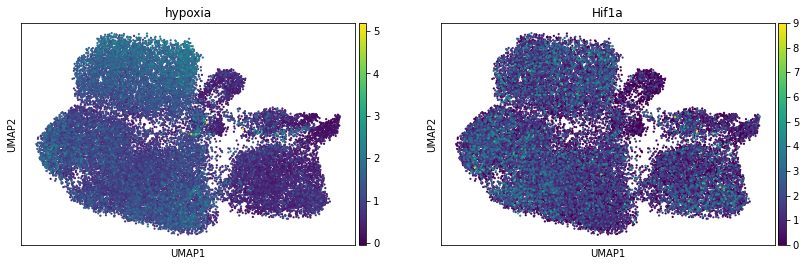

In [45]:
sc.pl.umap(adata, color=['hypoxia','Hif1a'], size=20)